<a href="https://colab.research.google.com/github/ShaliniR8/movie-recommendation-1/blob/feat%2Fexp/mov_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System Analysis and Training
This notebook performs data analysis, feature extraction, correlation analysis, and training for a movie recommendation system.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from joblib import dump

## Data Loading

In [4]:
interaction_file = "file.tsv"
movies_file = "Movie_Id_Titles.csv"

interaction_columns = ["user_id", "item_id", "rating", "timestamp"]
movie_columns = ["movie_id", "movie_name"]
interactions = pd.read_csv(interaction_file, sep="\t", names=interaction_columns)
movies = pd.read_csv(movies_file, names=movie_columns)

## Data Analysis

In [5]:
print(interactions.head())
print(interactions.info())

print(movies.head())
print(movies.info())

print(interactions.describe())
print(movies.describe())

   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
  movie_id         movie_name
0  item_id              title
1        1   Toy Story (1995)
2        2   GoldenEye (1995)
3        3  Four Rooms (1995)
4        4  Get Shorty (1995)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id

## Merging Data

In [6]:
interactions['item_id'] = interactions['item_id'].astype(str)
movies['movie_id'] = movies['movie_id'].astype(str)

merged_data = interactions.merge(movies, left_on="item_id", right_on="movie_id", how="left")
print(merged_data.head())

   user_id item_id  rating  timestamp movie_id  \
0        0      50       5  881250949       50   
1        0     172       5  881250949      172   
2        0     133       1  881250949      133   
3      196     242       3  881250949      242   
4      186     302       3  891717742      302   

                        movie_name  
0                 Star Wars (1977)  
1  Empire Strikes Back, The (1980)  
2        Gone with the Wind (1939)  
3                     Kolya (1996)  
4         L.A. Confidential (1997)  


## Correlation Analysis

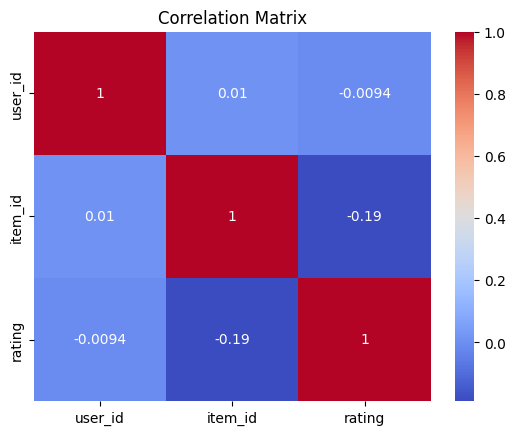

In [8]:
correlation_matrix = merged_data[['user_id', 'item_id', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Feature Extraction

In [9]:
user_item_matrix = merged_data.pivot_table(index="user_id", columns="item_id", values="rating", fill_value=0)
print(user_item_matrix.head())

item_id    1   10  100  1000  1001  1002  1003  1004  1005  1006  ...  990  \
user_id                                                           ...        
0        0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
1        5.0  3.0  5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
2        4.0  2.0  5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
3        0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
4        0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   

item_id  991  992  993  994  995  996  997  998  999  
user_id                                               
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1682 columns]


## Training the Model

In [10]:
# Splitting data
X = user_item_matrix
y = merged_data.groupby('user_id')['rating'].mean()  # Average rating per user
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train using SVD
svd = TruncatedSVD(n_components=50, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=50, random_state=42)

## Model Evaluation

In [12]:
X_test_transformed = svd.transform(X_test)
X_train_transformed = svd.transform(X_train)
print("Explained Variance Ratio:", svd.explained_variance_ratio_.sum())

Explained Variance Ratio: 0.5425989073431002


## Save Model

In [14]:
dump(svd, "model.pkl")
print("Model saved successfully.")

Model saved successfully.
